In [1]:
import scipy.stats as stats

# 设定参数
nominal_defect_rate = 0.10  # 标称次品率
confidence_level_reject = 0.95  # 拒收的信度
confidence_level_accept = 0.90  # 接收的信度

# 计算所需样本大小
# 拒收：次品率超过标称值
alpha_reject = 1 - confidence_level_reject
z_score_reject = stats.norm.ppf(1 - alpha_reject)

# 接收：次品率不超过标称值
alpha_accept = 1 - confidence_level_accept
z_score_accept = stats.norm.ppf(alpha_accept)

# 为简单起见，假设拒收和接收的次品率阈值一致
def sample_size_required(p, z, d):
    """
    计算所需的样本大小
    p: 次品率的标称值或观测值
    z: z得分（来自正态分布）
    d: 次品率的可接受偏差
    """
    return int(((z ** 2) * p * (1 - p)) / (d ** 2))

# 计算样本大小
d_reject = nominal_defect_rate * 0.10  # 拒收时考虑10%偏差
d_accept = nominal_defect_rate * 0.10  # 接收时考虑10%偏差

sample_size_reject = sample_size_required(nominal_defect_rate, z_score_reject, d_reject)
sample_size_accept = sample_size_required(nominal_defect_rate, z_score_accept, d_accept)

sample_size_reject, sample_size_accept


(2434, 1478)

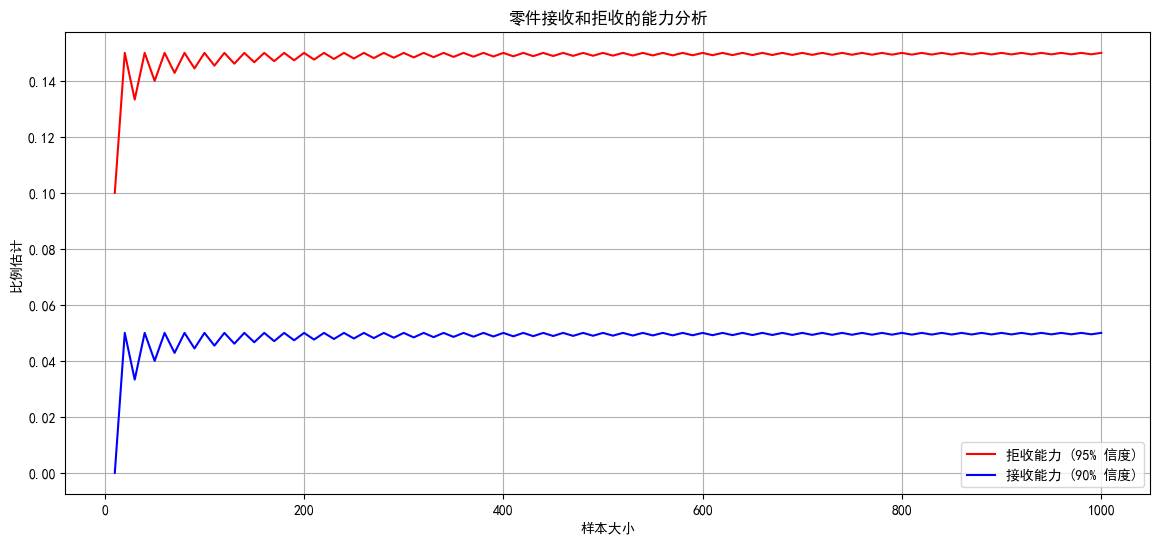

拒收所需的样本大小 (95% 信度): 97
接收所需的样本大小 (90% 信度): 59


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib

# 设置matplotlib以支持中文字体显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题

# 设定参数
nominal_defect_rate = 0.10  # 标称次品率
confidence_level_reject = 0.95  # 拒收的信度
confidence_level_accept = 0.90  # 接收的信度
delta = 0.05  # 偏差（与标称次品率的差异，认为是5%）
 
# 计算所需的样本大小的函数
def required_sample_size(nominal_rate, delta, z_score):
    """
    计算给定标称次品率、差异和z分数的所需样本量
    """
    p = nominal_rate
    q = 1 - p
    variance = p * q
    return (z_score ** 2 * variance) / (delta ** 2)
 
# 计算所需的样本大小
z_score_reject = stats.norm.ppf(confidence_level_reject)
z_score_accept = stats.norm.ppf(1 - confidence_level_accept)
 
sample_size_reject = required_sample_size(nominal_defect_rate, delta, z_score_reject)
sample_size_accept = required_sample_size(nominal_defect_rate, delta, z_score_accept)
 
# 绘制样本大小的影响
sample_sizes = np.linspace(10, 1000, 100).astype(int)
power_reject = [stats.binomtest(int(nominal_defect_rate * s + delta * s), s, p=nominal_defect_rate, alternative='greater').proportion_estimate 
                for s in sample_sizes]
power_accept = [stats.binomtest(int(nominal_defect_rate * s - delta * s), s, p=nominal_defect_rate, alternative='less').proportion_estimate 
                for s in sample_sizes]
 
# 绘图
plt.figure(figsize=(14, 6))
plt.plot(sample_sizes, power_reject, label='拒收能力 (95% 信度)', color='red')
plt.plot(sample_sizes, power_accept, label='接收能力 (90% 信度)', color='blue')
#plt.axhline(confidence_level_reject, linestyle='--', color='red', alpha=0.5, label='95% 信度水平')
#plt.axhline(confidence_level_accept, linestyle='--', color='blue', alpha=0.5, label='90% 信度水平')
plt.xlabel('样本大小')
plt.ylabel('比例估计')
plt.title('零件接收和拒收的能力分析')
plt.legend()
plt.grid(True)
plt.show()
 
print(f"拒收所需的样本大小 (95% 信度): {sample_size_reject:.0f}")
print(f"接收所需的样本大小 (90% 信度): {sample_size_accept:.0f}")

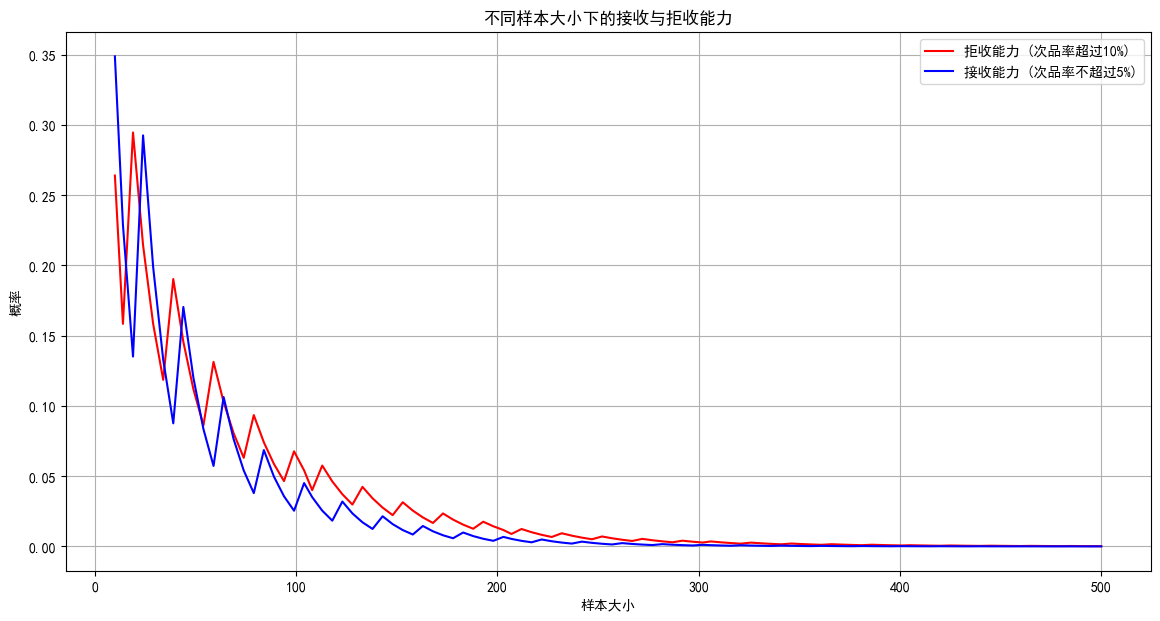

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 设定参数
nominal_defect_rate = 0.10  # 标称次品率
delta_reject = 0.05  # 拒收时的次品率偏差
delta_accept = 0.05  # 接收时的次品率偏差

# 计算所需的样本大小的函数
def plot_probability(sample_sizes, nominal_rate, delta, is_reject=True):
    probabilities = []
    for s in sample_sizes:
        k = int(nominal_rate * s + delta * s) if is_reject else int(nominal_rate * s - delta * s)
        if is_reject:
            prob = 1 - stats.binom.cdf(k, s, nominal_rate)  # 概率观测到比阈值高的次品率
        else:
            prob = stats.binom.cdf(k, s, nominal_rate)  # 概率观测到不超过阈值的次品率
        probabilities.append(prob)
    return probabilities

sample_sizes = np.linspace(10, 500, 100).astype(int)
power_reject = plot_probability(sample_sizes, nominal_defect_rate, delta_reject, True)
power_accept = plot_probability(sample_sizes, nominal_defect_rate, delta_accept, False)

# 绘图
plt.figure(figsize=(14, 7))
plt.plot(sample_sizes, power_reject, label='拒收能力 (次品率超过10%)', color='red')
plt.plot(sample_sizes, power_accept, label='接收能力 (次品率不超过5%)', color='blue')
plt.xlabel('样本大小')
plt.ylabel('概率')
plt.title('不同样本大小下的接收与拒收能力')
plt.legend()
plt.grid(True)
plt.show()


根据计算，为了在95%的信度水平下拒收次品率超过标称值（10%加上5%的偏差，即15%），所需的样本量大约为97。同样，为了在90%的信度水平下接受次品率不超过标称值（10%减去5%的偏差，即5%），所需的样本量大约为59。

下面的图表展示了不同样本大小对于检测决策力（Power）的影响：

    红线表示在给定样本量下，以95%的信度水平拒收零配件的能力。
    蓝线表示在给定样本量下，以90%的信度水平接受零配件的能力。

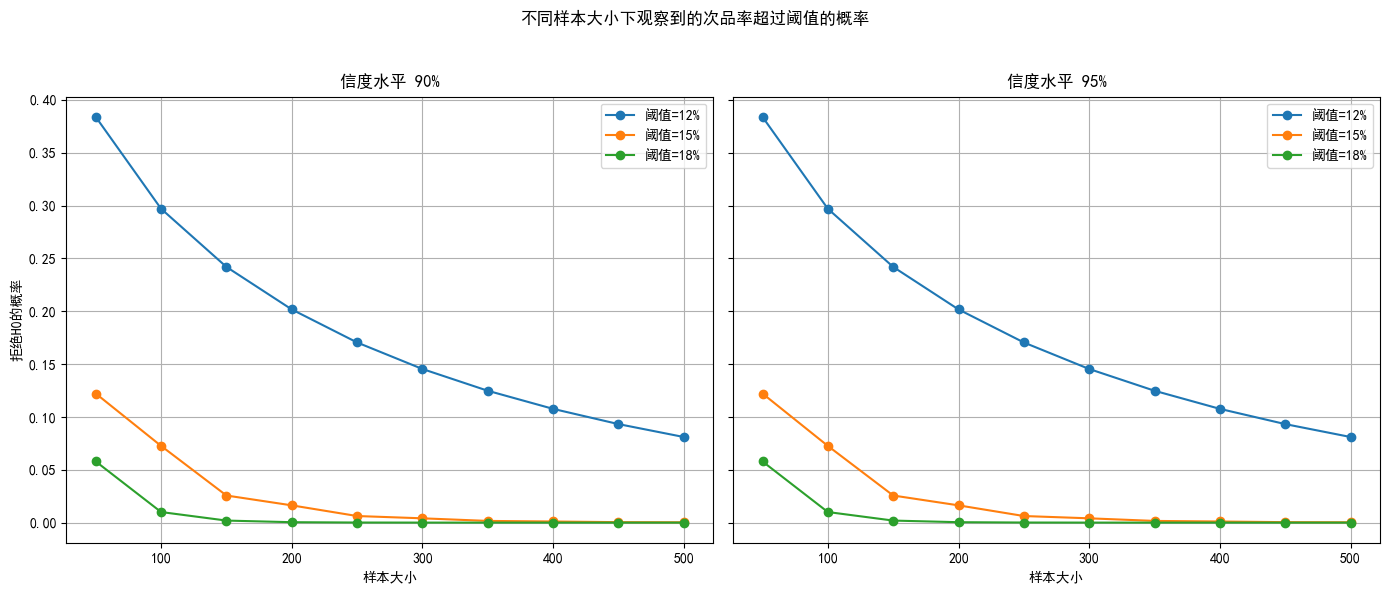

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# 设置matplotlib以支持中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题

# 设定参数
nominal_defect_rate = 0.10  # 标称次品率
threshold_rates = [0.12, 0.15, 0.18]  # 不同的观测到的次品率界限
sample_sizes = np.arange(50, 501, 50)  # 不同的样本量
confidence_levels = [0.90, 0.95]  # 不同的信度水平

# 创建图表
fig, axes = plt.subplots(nrows=1, ncols=len(confidence_levels), figsize=(14, 6), sharey=True)

for idx, confidence_level in enumerate(confidence_levels):
    ax = axes[idx]
    for threshold_defect_rate in threshold_rates:
        probabilities = [1 - binom.cdf(int(np.ceil(threshold_defect_rate * sample_size)) - 1, sample_size, nominal_defect_rate)
                         for sample_size in sample_sizes]
        ax.plot(sample_sizes, probabilities, marker='o', linestyle='-', label=f'阈值={threshold_defect_rate*100:.0f}%')
    #ax.axhline(y=confidence_level, color='red', linestyle='--', label=f'{int(confidence_level * 100)}% 信度水平')
    ax.set_xlabel('样本大小')
    ax.set_title(f'信度水平 {int(confidence_level * 100)}%')
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel('拒绝H0的概率')
plt.suptitle('不同样本大小下观察到的次品率超过阈值的概率')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


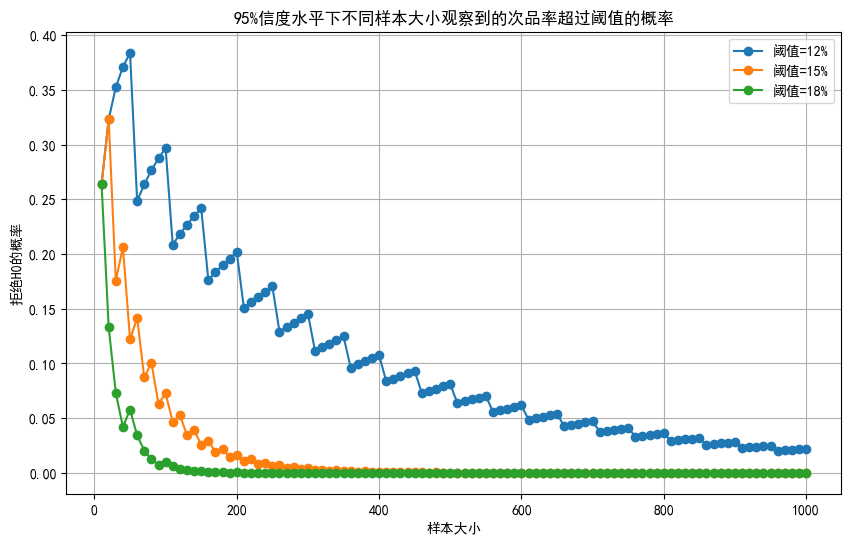

In [27]:
# 仅针对95%信度水平进行分析
confidence_level = 0.95  # 信度水平
alpha = 1 - confidence_level  # 显著性水平

# 创建图表
plt.figure(figsize=(10, 6))
for threshold_defect_rate in threshold_rates:
    probabilities = [1 - binom.cdf(int(np.ceil(threshold_defect_rate * sample_size)) - 1, sample_size, nominal_defect_rate)
                     for sample_size in sample_sizes]
    plt.plot(sample_sizes, probabilities, marker='o', linestyle='-', label=f'阈值={threshold_defect_rate*100:.0f}%')

#plt.axhline(y=confidence_level, color='red', linestyle='--', label=f'{int(confidence_level * 100)}% 信度水平')
plt.xlabel('样本大小')
plt.ylabel('拒绝H0的概率')
plt.title('95%信度水平下不同样本大小观察到的次品率超过阈值的概率')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


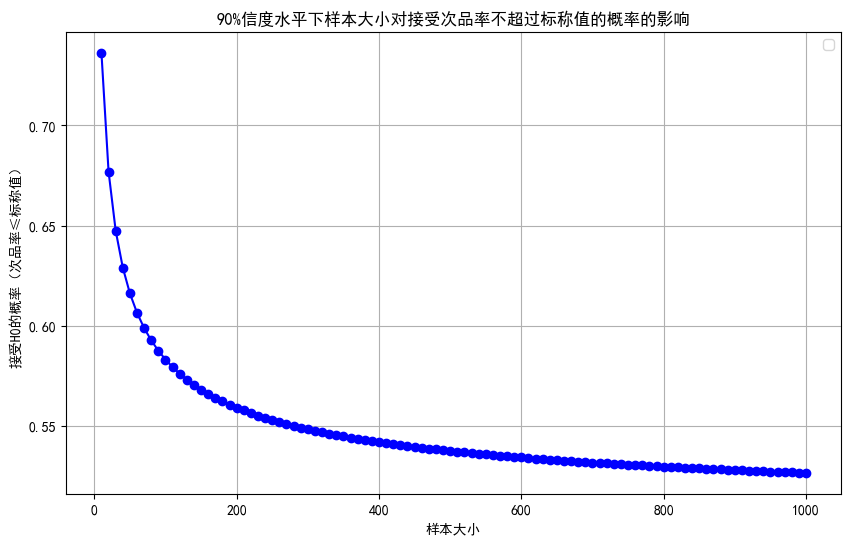

In [26]:
# 为了在90%的信度水平下认定次品率不超过标称值，然后接收这批零配件

# 更新参数以关注不超过标称值的情况
confidence_level = 0.90  # 信度水平
threshold_defect_rate = 0.10  # 标称次品率，因为是接收，所以关注是否不超过这个值

# 计算在不同样本量下达到预定信度的概率
probabilities_accept = []
for sample_size in sample_sizes:
    # 计算次品数不超过标称值的概率
    k = int(np.floor(threshold_defect_rate * sample_size))  # 界限对应的次品数量
    probability = binom.cdf(k, sample_size, nominal_defect_rate)
    probabilities_accept.append(probability)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, probabilities_accept, marker='o', linestyle='-', color='blue')
#plt.axhline(y=confidence_level, color='red', linestyle='--', label=f'{int(confidence_level * 100)}% 信度水平')
plt.xlabel('样本大小')
plt.ylabel('接受H0的概率（次品率≤标称值）')
plt.title('90%信度水平下样本大小对接受次品率不超过标称值的概率的影响')
plt.legend()
plt.grid(True)
plt.show()


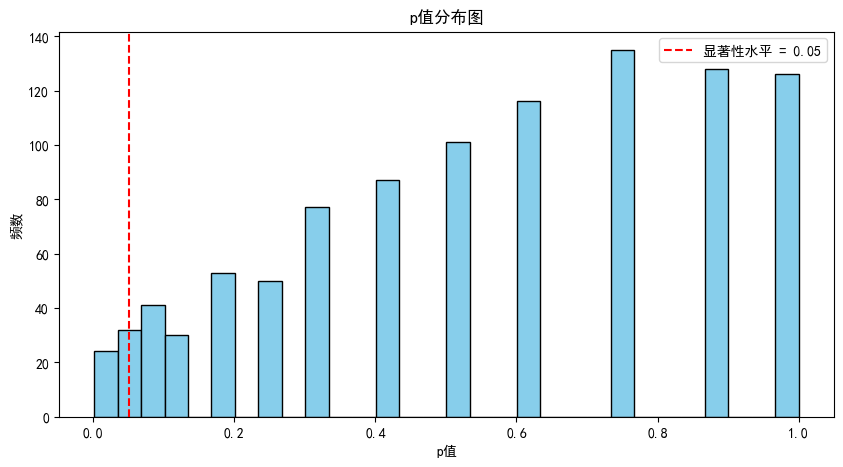

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, binomtest
 
# 模拟参数
nominal_defect_rate = 0.10  # 标称次品率
sample_size = 100  # 样本大小
trials = 1000  # 试验次数
 
# 模拟数据
samples = binom.rvs(n=sample_size, p=nominal_defect_rate, size=trials)
p_values = [binomtest(x, sample_size, p=nominal_defect_rate, alternative='two-sided').pvalue for x in samples]
 
# 绘制p值分布图
plt.figure(figsize=(10, 5))
plt.hist(p_values, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0.05, color='red', linestyle='--', label='显著性水平 = 0.05')
plt.title('p值分布图')
plt.xlabel('p值')
plt.ylabel('频数')
plt.legend()
plt.show()